# Sales Analysis Project

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

### Import data 


In [2]:
files = [file for file in os.listdir('./project_data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./project_data/' + file)
    all_data = pd.concat([all_data,df])

    
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Cleaning the data

In [3]:
nan = all_data[all_data.isna().any(axis=1)]
nan 

all_data = all_data.dropna(how='all')

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']



keys = all_data.keys()

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Add month column


In [4]:
date = all_data['Order Date'].str[0:2]
date

all_data['Month'] = date
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Change type

In [5]:
all_data = all_data.astype({
    'Order ID': 'int64',
    'Quantity Ordered': 'int64',
    'Price Each': 'float64',
    'Month': 'int64' 
})

all_data.dtypes



Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

### Agregate by month

(array([2., 2., 2., 1., 2., 1., 1., 0., 0., 1.]),
 array([1822256.72999991, 2101375.39100008, 2380494.05200024,
        2659612.7130004 , 2938731.37400056, 3217850.03500072,
        3496968.69600089, 3776087.35700105, 4055206.01800121,
        4334324.67900137, 4613443.34000153]),
 <BarContainer object of 10 artists>)

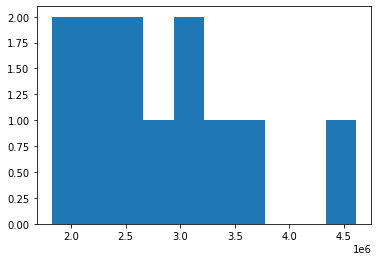

In [30]:
all_data['Total Income'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head(50)

total_income_by_month = all_data.loc[:, ['Month', 'Total Income']].groupby('Month').sum().sort_values(by='Total Income', ascending=False)
total_quantity_by_month = all_data.loc[:, ['Month', 'Quantity Ordered']].groupby('Month').sum().sort_values(by='Quantity Ordered', ascending=False)

plt.hist(total_income_by_month)



In [7]:
def get_city(add):
    return add.split(',')[1]
    
def get_state(add):
    return add.split(',')[2].split(' ')[1]
   
    
    

    
city = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_data['City'] = city  

a = all_data.loc[:, ['City', 'Total Income']].groupby('City').sum().sort_values(by='Total Income', ascending=False)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Income,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


### Best time to advertiise

In [8]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute




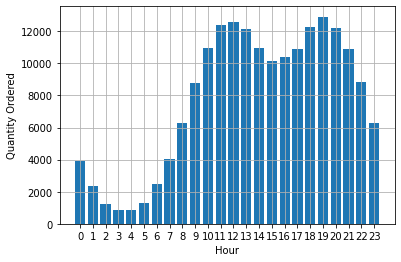

In [9]:
hours = [hour for hour, df in all_data.groupby('Hour')]

## alternative 

hours2 = np.arange(0,24)



plt.bar(hours, all_data.groupby('Hour').count()["Quantity Ordered"])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')
plt.grid()
plt.show()



In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Income,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


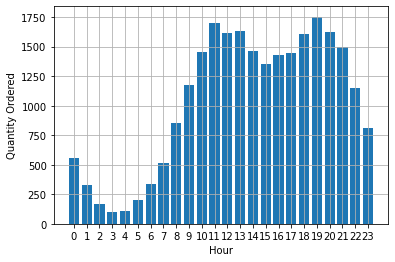

,Quantity Ordered,Quantity Ordered
Hour,,
0,635,4428
1,369,2619
2,185,1398
3,118,928
4,119,937
5,233,1493
6,377,2810
7,578,4556
8,960,7002


In [11]:
nyc = all_data.loc[all_data['City'].str.contains('New York') ]
a = nyc.groupby(by=['Hour'])['Quantity Ordered'].sum().sort_values(ascending=False)

plt.bar(hours, nyc.groupby('Hour').count()["Quantity Ordered"])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')
plt.grid()
plt.show()

c = all_data.groupby(by=['Hour'])['Quantity Ordered'].sum()

b = pd.concat([a,c], axis = 1)
b

### Compare

In [12]:
nyc = all_data.loc[all_data['City'].str.contains('New York') ]

a = nyc.groupby(by=['Hour']).count()

b = all_data.groupby(by=['Hour']).count()

c = pd.concat([a,b], axis = 1)
c['Quantity Ordered']


,Quantity Ordered,Quantity Ordered
Hour,,
0,557,3910
1,328,2350
2,164,1243
3,100,831
4,107,854
5,204,1321
6,336,2482
7,517,4011
8,857,6256


In [13]:
cities = all_data['City'].unique()
nn =  [print(all_data.groupby(el)) for el in cities]

for el in all_data['City']:
    el = all_data.groupby()

KeyError: ' New York City NY'

### Sold together

In [ ]:
dup = all_data[all_data['Order ID'].duplicated(keep=False)]
dup['Grouped'] = dup.groupby("Order ID")['Product'].transform(lambda x: ', '.join(x))

# dup.groupby("Order ID")['Product'].sum()

# dup.groupby(['Order ID','Product']).sum()

dup = dup[['Order ID', 'Grouped']].drop_duplicates()

dup.head()


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
                 
count

### Best product to buy


In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']


products = [product for product, df in product_group]




plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.show()


### Correlation between price and quantity ordered


In [ ]:
plt.scatter(product_group['Price Each'].mean(), quantity_ordered)
plt.xticks(rotation='vertical')

plt.show()
# z = np.polyfit(product_group['Price Each'].mean(), quantity_ordered, 1)
# p = np.poly1d(z)
# plt.plot(product_group['Price Each'].mean(),p(product_group['Price Each'].mean()),"r--")



new = np.corrcoef(product_group['Price Each'].mean(), quantity_ordered)
new